In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import keras
import librosa
from librosa import display
%matplotlib inline

In [32]:
train = pd.read_csv("/content/drive/MyDrive/UGP23/dataset/Yoga_82_modified/yoga_82/train_keypoints_yoga82.csv")

In [33]:
train.labels.value_counts()

6    274
4    240
8    189
3    162
5    158
7    135
2    123
1    111
0    110
Name: labels, dtype: int64

In [34]:
x_train = train.drop(['file_name', 'labels'], axis=1)
y_train = train.labels

In [35]:
x_train = x_train.iloc[:, :3].join(x_train.iloc[:, 33:])     ##red 23 kp
x_train

,NOSE_x,NOSE_y,NOSE_score,LEFT_SHOULDER_x,LEFT_SHOULDER_y,LEFT_SHOULDER_score,RIGHT_SHOULDER_x,RIGHT_SHOULDER_y,RIGHT_SHOULDER_score,LEFT_ELBOW_x,...,LEFT_HEEL_score,RIGHT_HEEL_x,RIGHT_HEEL_y,RIGHT_HEEL_score,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_score,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_score
0,0.692113,0.597546,0.998951,0.691453,0.475669,0.999959,0.681048,0.502450,0.999693,0.608357,...,0.459569,0.305410,0.523669,0.961329,0.331636,0.504995,0.566890,0.260367,0.597948,0.972374
1,0.315723,0.292811,0.999945,0.409514,0.394050,0.999831,0.433733,0.372546,0.999455,0.432676,...,0.999468,0.810174,0.723567,0.880871,0.911096,0.888562,0.999108,0.849730,0.807028,0.892986
2,0.569304,0.255873,1.000000,0.501002,0.305450,0.999969,0.527418,0.314001,0.999995,0.484356,...,0.992288,0.710622,0.732236,0.999540,0.488998,0.684702,0.994070,0.808110,0.744183,0.999627
3,0.805867,0.212494,0.999709,0.699956,0.381279,0.999975,0.742081,0.411654,0.999977,0.686605,...,0.894938,0.185144,0.802472,0.999524,0.094137,0.897721,0.908215,0.083052,0.902261,0.999369
4,0.489411,0.177114,0.999858,0.544896,0.260118,0.999977,0.433003,0.255952,0.999982,0.560405,...,0.129494,0.522425,0.890630,0.602616,0.523790,0.639308,0.148508,0.530609,0.928743,0.821828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,0.525786,0.137871,1.000000,0.548754,0.233216,1.000000,0.447545,0.247651,0.999997,0.626977,...,0.999914,0.245784,0.287702,0.998788,0.483457,0.923298,0.999954,0.221414,0.204772,0.999346
1498,0.414844,0.212979,0.999174,0.371894,0.324141,0.998887,0.390676,0.312218,0.999466,0.316904,...,0.944328,0.517941,0.855166,0.953308,0.099569,0.836094,0.859048,0.603849,0.850410,0.945645
1499,0.408738,0.684995,0.989426,0.386766,0.552480,0.999028,0.381445,0.530683,0.995565,0.298688,...,0.873428,0.886441,0.665781,0.019250,0.806759,0.826442,0.820141,0.808351,0.765644,0.026248
1500,0.287048,0.326413,0.996459,0.267494,0.362244,0.999999,0.261422,0.297561,0.999996,0.554442,...,0.662061,0.876162,0.512869,0.681303,0.214701,0.392351,0.545692,0.846982,0.593082,0.538932


In [36]:
y_train = y_train.astype('float64')

In [37]:
y_train = keras.utils.to_categorical(y_train)

In [38]:
test = pd.read_csv("/content/drive/MyDrive/UGP23/dataset/Yoga_82_modified/yoga_82/test_keypoints_yoga82.csv")

In [39]:
test.labels.value_counts()

6    69
4    60
8    47
5    40
3    40
7    34
2    31
0    28
1    27
Name: labels, dtype: int64

In [40]:
x_test = test.drop(['file_name', 'labels'], axis=1)
y_test = test.labels

In [41]:
x_test = x_test.iloc[:, :3].join(x_test.iloc[:, 33:])   ##red 23 kp

In [42]:
y_test = test.labels.astype('float64')

In [43]:
y_test = keras.utils.to_categorical(y_test)

In [44]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dense,Dropout,Activation
from sklearn import metrics
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [45]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [46]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1201, 69)
(1201, 9)
(376, 69)
(376, 9)


In [47]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(69,)))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(9, activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               8960      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 9)                

In [48]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
checkpoint_path = "/content/drive/MyDrive/UGP23/dataset/Yoga_82_modified/weights_yoga82_red.best_ann.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')
earlystopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=100)

In [50]:
history = model.fit(x_train, y_train, epochs=200, batch_size = 32, validation_data=(x_val, y_val), callbacks=[checkpoint, earlystopping])

Epoch 1/200
34/38 [=========================>....] - ETA: 0s - loss: 2.0726 - accuracy: 0.1939
Epoch 1: val_accuracy improved from -inf to 0.38870, saving model to /content/drive/MyDrive/UGP23/dataset/Yoga_82_modified/weights_yoga82_red.best_ann.hdf5
38/38 [==============================] - 2s 14ms/step - loss: 2.0584 - accuracy: 0.2032 - val_loss: 1.7190 - val_accuracy: 0.3887
Epoch 2/200
19/38 [==============>...............] - ETA: 0s - loss: 1.7895 - accuracy: 0.3109
Epoch 2: val_accuracy improved from 0.38870 to 0.51495, saving model to /content/drive/MyDrive/UGP23/dataset/Yoga_82_modified/weights_yoga82_red.best_ann.hdf5
38/38 [==============================] - 0s 5ms/step - loss: 1.6639 - accuracy: 0.3639 - val_loss: 1.3294 - val_accuracy: 0.5150
Epoch 3/200
26/38 [===================>..........] - ETA: 0s - loss: 1.4168 - accuracy: 0.4267
Epoch 3: val_accuracy improved from 0.51495 to 0.63455, saving model to /content/drive/MyDrive/UGP23/dataset/Yoga_82_modified/weights_yoga82_

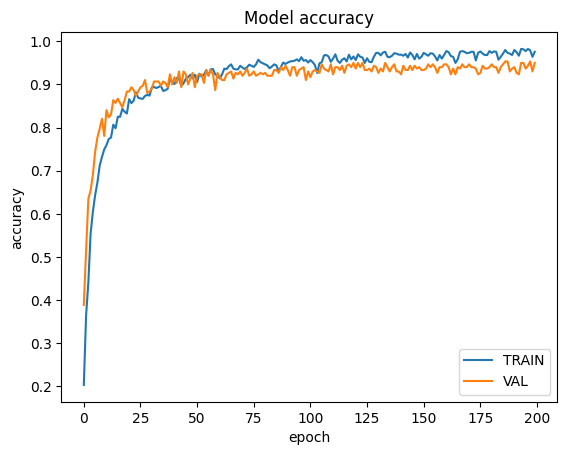

In [51]:
# Visualize the training history to see whether you're overfitting.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['TRAIN', 'VAL'], loc='lower right')
plt.show()

In [52]:
from keras.models import load_model

model = load_model("/content/drive/MyDrive/UGP23/dataset/Yoga_82_modified/weights_yoga82_red.best_ann.hdf5")

In [53]:
model.evaluate(x_train, y_train)

38/38 [==============================] - 0s 1ms/step - loss: 0.0128 - accuracy: 0.9967


[0.012787061743438244, 0.9966694712638855]

In [54]:
model.evaluate(x_val, y_val)

10/10 [==============================] - 0s 1ms/step - loss: 0.2950 - accuracy: 0.9535


[0.29499441385269165, 0.9534883499145508]

In [55]:
model.evaluate(x_test, y_test)

12/12 [==============================] - 0s 1ms/step - loss: 0.2607 - accuracy: 0.9388


[0.26073625683784485, 0.938829779624939]

In [56]:
y_pred = model.predict(x_test)

12/12 [==============================] - 0s 1ms/step


In [57]:
y_pred

array([[2.5954735e-04, 1.8503782e-15, 9.5456791e-13, ..., 3.5522428e-06,
        9.6970750e-13, 5.6834585e-07],
       [9.9998897e-01, 1.3369055e-12, 1.8329715e-15, ..., 1.6219219e-07,
        2.3416711e-15, 8.6234477e-06],
       [1.2278596e-09, 1.6784702e-17, 6.2718872e-11, ..., 9.9999672e-01,
        1.3589057e-14, 1.2521843e-13],
       ...,
       [4.7214718e-14, 7.1172304e-11, 9.9999982e-01, ..., 2.7565935e-08,
        1.2585791e-07, 2.2470494e-11],
       [1.7875829e-14, 9.9999994e-01, 1.5238409e-11, ..., 7.8510712e-11,
        6.0707067e-10, 9.3068924e-14],
       [2.0507885e-06, 1.7338041e-11, 2.4085705e-07, ..., 9.9973679e-01,
        1.5656163e-09, 5.8937166e-09]], dtype=float32)

In [58]:
y_pred.shape

(376, 9)

In [59]:
y_pred[0]

array([2.5954735e-04, 1.8503782e-15, 9.5456791e-13, 2.5750598e-11,
       9.9973619e-01, 1.1001795e-08, 3.5522428e-06, 9.6970750e-13,
       5.6834585e-07], dtype=float32)

In [60]:
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([4, 0, 6, 0, 5, 4, 3, 0, 6, 3, 5, 6, 1, 3, 8, 0, 3, 3, 5, 6, 7, 6,
       2, 0, 6, 6, 4, 6, 3, 6, 5, 6, 6, 8, 4, 4, 3, 0, 6, 4, 6, 6, 4, 6,
       4, 0, 4, 2, 4, 2, 8, 2, 8, 6, 0, 1, 7, 6, 6, 6, 7, 8, 4, 4, 6, 3,
       5, 3, 5, 0, 7, 2, 6, 4, 3, 3, 3, 8, 2, 7, 8, 7, 2, 1, 8, 3, 7, 7,
       5, 2, 7, 5, 8, 4, 1, 7, 6, 5, 0, 5, 6, 4, 5, 0, 0, 4, 0, 8, 1, 6,
       6, 4, 2, 6, 4, 1, 8, 6, 5, 8, 2, 3, 2, 3, 6, 6, 7, 6, 3, 4, 6, 6,
       7, 1, 8, 8, 4, 2, 6, 7, 5, 6, 0, 8, 2, 2, 3, 0, 5, 8, 4, 5, 5, 8,
       8, 4, 8, 8, 6, 0, 0, 1, 2, 7, 0, 7, 8, 5, 7, 6, 0, 7, 8, 6, 4, 4,
       4, 7, 2, 6, 8, 2, 4, 5, 8, 4, 6, 0, 5, 4, 7, 6, 4, 5, 6, 8, 8, 6,
       6, 6, 3, 7, 7, 4, 3, 6, 8, 2, 6, 4, 0, 6, 2, 6, 8, 8, 8, 7, 0, 4,
       0, 8, 6, 6, 1, 6, 5, 5, 1, 0, 4, 4, 6, 0, 5, 5, 5, 2, 2, 6, 2, 8,
       8, 2, 8, 1, 2, 6, 3, 3, 2, 7, 6, 8, 3, 7, 8, 1, 6, 3, 0, 8, 2, 4,
       1, 6, 3, 4, 8, 8, 8, 5, 7, 0, 7, 6, 6, 8, 3, 7, 2, 4, 4, 7, 8, 6,
       4, 8, 1, 6, 6, 5, 2, 1, 6, 6, 3, 6, 1, 1, 0,

In [61]:
pose_test = [None] * y_test.size
pose_pred = [None] * y_pred.size

for i in range(len(y_test)):
    if(y_test[i]==0): pose_test[i] = 'Plank'           
    if(y_test[i]==1): pose_test[i] = 'Warrior_I'       
    if(y_test[i]==2): pose_test[i] = 'Standing_big_toe'     
    if(y_test[i]==3): pose_test[i] = 'Warrior_II'         
    if(y_test[i]==4): pose_test[i] = 'Cat_Cow'         
    if(y_test[i]==5): pose_test[i] = 'Child'            
    if(y_test[i]==6): pose_test[i] = 'Cobra'     
    if(y_test[i]==7): pose_test[i] = 'Tree'              
    if(y_test[i]==8): pose_test[i] = 'Downward-Facing_Dog'


for i in range(len(y_pred)):
    if(y_pred[i]==0): pose_pred[i] = 'Plank'                           
    if(y_pred[i]==1): pose_pred[i] = 'Warrior_I'                   
    if(y_pred[i]==2): pose_pred[i] = 'Standing_big_toe'     
    if(y_pred[i]==3): pose_pred[i] = 'Warrior_II'                      
    if(y_pred[i]==4): pose_pred[i] = 'Cat_Cow'                                              
    if(y_pred[i]==5): pose_pred[i] = 'Child'                                 
    if(y_pred[i]==6): pose_pred[i] = 'Cobra'                              
    if(y_pred[i]==7): pose_pred[i] = 'Tree'                                    
    if(y_pred[i]==8): pose_pred[i] = 'Downward-Facing_Dog'     

In [62]:
confusion_matrix(pose_test, pose_pred)

array([[52,  0,  2,  3,  3,  0,  0,  0,  0],
       [ 2, 37,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 67,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  1, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 28,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 33,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 25,  1],
       [ 0,  0,  1,  0,  0,  1,  2,  1, 35]])

In [63]:
! pip install -q scikit-plot

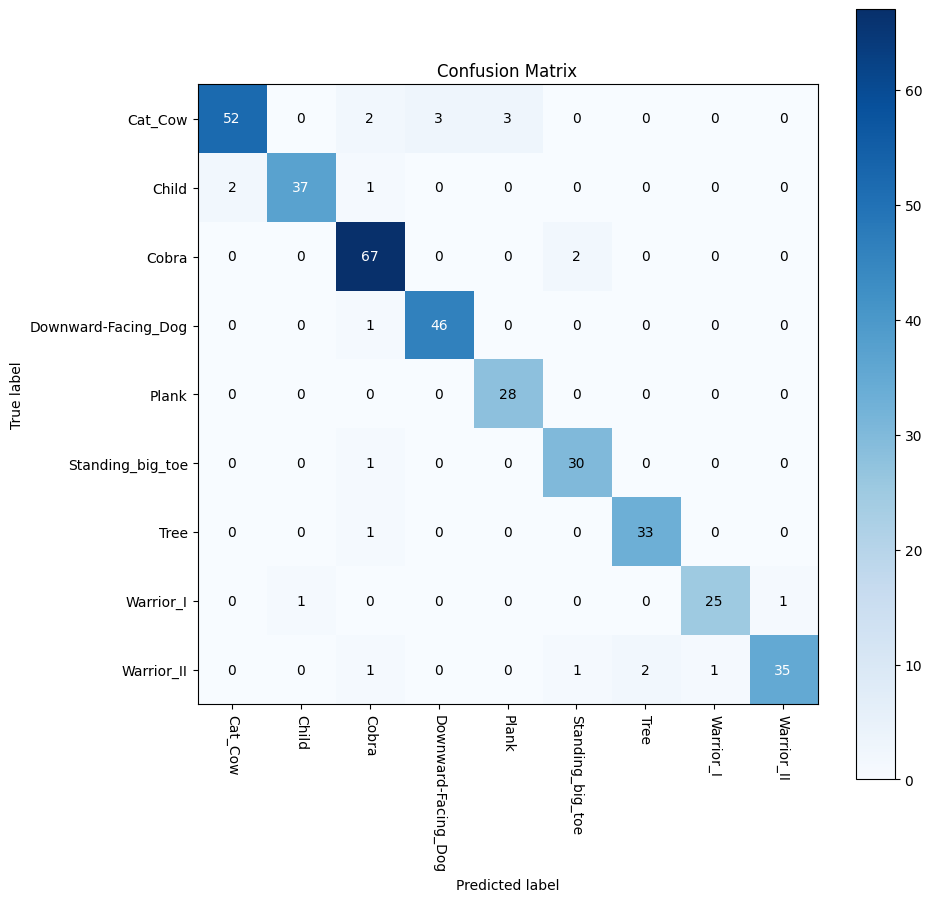

In [64]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(pose_test, pose_pred, figsize=(10,10))

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=270)
plt.show()

In [65]:
from sklearn.metrics import f1_score, precision_score, recall_score

f1_score(pose_test, pose_pred, average='weighted')

0.9384544762532749

In [66]:
precision_score(pose_test, pose_pred, average='weighted')

0.9406922317059274

In [67]:
recall_score(pose_test, pose_pred, average='weighted')

0.9388297872340425

In [68]:
from sklearn.metrics import f1_score

# Convert pose_val and pose_pred to numpy arrays
nppose_val = np.array(pose_test)
nppose_pred = np.array(pose_pred)

# Get a list of all unique labels
labels = np.unique(nppose_val)

# Calculate F1 score for each label
for label in labels:
    # Create a binary array indicating if the label matches the current label
    y_true = (nppose_val == label)
    y_pred = (nppose_pred == label)
    
    # Calculate F1 score
    f1 = f1_score(y_true, y_pred)
    
    # Print the F1 score for the current label
    print(f"F1 score for {label}: {f1}")


F1 score for Cat_Cow: 0.912280701754386
F1 score for Child: 0.9487179487179489
F1 score for Cobra: 0.937062937062937
F1 score for Downward-Facing_Dog: 0.9583333333333333
F1 score for Plank: 0.9491525423728813
F1 score for Standing_big_toe: 0.9374999999999999
F1 score for Tree: 0.9565217391304348
F1 score for Warrior_I: 0.9433962264150944
F1 score for Warrior_II: 0.9210526315789473
